# MTG, Easy as A.B.C.
*By Anthony Broussard, Brandon Pimentel, and Charles Zieres*

Our team is using the data from a Magic: the Gathering (MTG) dataset available [HERE](https://www.kaggle.com/datasets/camilonunez/magic-the-gathering-top8-some-decks-and-events/data)

We will develop a predictive model that estimates the win probability of a given deck in tournaments utilizing the deck's total price as a primary feature. In this project, we aim to understand the relationship between deck price and performance, in order to gauge the extent to which monetary investment has an impact on success chances.

**Environment setup:**

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

**Preprocessing:**

In [28]:
# Read the cards and price information
df_prices = pd.read_csv('data/cardPrices.csv')
df_cards = pd.read_csv('data/cards.csv')

filtered_cards = df_cards[['name', 'artist', 'setCode', 'rarity', 'type', 'uuid']]

#combining the cards and pricing information into a single dataframe
df_comb = pd.merge(filtered_cards, df_prices, on='uuid')

C:\Users\Brandon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3550: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Exploration & visualization:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515809 entries, 0 to 515808
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cardFinish        515809 non-null  object 
 1   currency          515809 non-null  object 
 2   date              515809 non-null  object 
 3   gameAvailability  515809 non-null  object 
 4   price             515809 non-null  float64
 5   priceProvider     515809 non-null  object 
 6   providerListing   515809 non-null  object 
 7   uuid              515809 non-null  object 
dtypes: float64(1), object(7)
memory usage: 31.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artist                   89602 non-null  object 
 1   artistIds                89602 non-null  object 
 2   asciiName                21

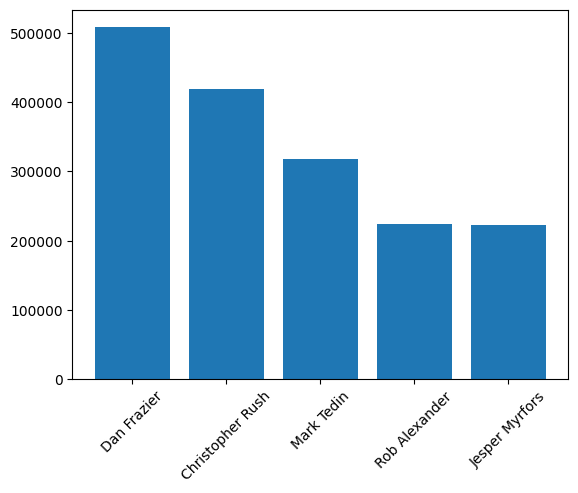

name
Black Lotus                       357552.58
Timetwister                       100975.23
Mox Emerald                        98192.51
Mox Jet                            95706.48
Mox Sapphire                       88274.14
                                    ...    
Murderous Redcap Avatar                0.02
Higure, the Still Wind Avatar          0.02
Akroma, Angel of Wrath Avatar          0.02
Arcanis, the Omnipotent Avatar         0.02
Figure of Destiny Avatar               0.02
Name: price, Length: 27689, dtype: float64

In [35]:
# Get a feel for the current data
df_prices.info()
df_cards.info()

filtered_cards.info()

print(df_prices.iloc[:10,:10])
print(df_cards.iloc[:10,:10])
df_cards.shape


# Generating the sum of all card prices and grouping them by artist. 
artVal = df_comb.groupby(['artist']).price.sum().sort_values(ascending=False)

# Generate a plot based on the top 5 with the highest combined sum
plt.bar(artVal[:5].index, artVal[:5].values)
plt.xticks(rotation=45)
plt.show()

df_comb.groupby(['name']).price.sum().sort_values(ascending=False)

**Machine Learning Prep:**